In [213]:
import pandas as pd
import numpy as np
import pylab as plt
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nkwjones/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [214]:
df2016=pd.read_csv('2016weather.csv')
df2017 = pd.read_csv('2017_weather.csv')
df=pd.concat([df2016,df2017])

In [215]:
print(df2016.shape, df2017.shape)

(10382, 17) (5531, 17)


In [216]:
df.head(2)

,Unnamed: 0,Conditions,Date,Dew Point,Events,Gust Speed,Heat Index,Humidity,Precip,Pressure,Temp.,Time (EDT),Time (EST),Visibility,Wind Dir,Wind Speed,Windchill
0,0,Overcast,"Jan. 01, 2016",25.0 °F,NaN,-,NaN,51%,NaN,30.06 in,42.1 °F,NaN,12:51 AM,10.0 mi,Variable,4.6 mph,39.2 °F
1,1,Overcast,"Jan. 01, 2016",25.0 °F,NaN,-,NaN,53%,NaN,30.06 in,41.0 °F,NaN,1:51 AM,10.0 mi,Variable,3.5 mph,39.0 °F


In [217]:
df['Time (EDT)']=df['Time (EDT)'].fillna('')
df['Time (EST)']=df['Time (EST)'].fillna('')
df['Time']=df['Time (EDT)']+df['Time (EST)']

In [218]:
df.columns

Index(['Unnamed: 0', 'Conditions', 'Date', 'Dew Point', 'Events', 'Gust Speed',
       'Heat Index', 'Humidity', 'Precip', 'Pressure', 'Temp.', 'Time (EDT)',
       'Time (EST)', 'Visibility', 'Wind Dir', 'Wind Speed', 'Windchill',
       'Time'],
      dtype='object')

In [219]:
df=df[['Conditions','Date','Temp.','Time','Visibility','Wind Speed','Humidity']]

In [220]:
df['vis']=pd.to_numeric(df['Visibility'].astype(str).str[:-3],errors='coerce')      # make columns numeric
df['temp']=pd.to_numeric(df['Temp.'].astype(str).str[:-3],errors='coerce')
df['wind_speed']=pd.to_numeric(df['Wind Speed'].astype(str).str[:-4],errors='coerce')
df['humidity']=pd.to_numeric(df['Humidity'].astype(str).str[:-1],errors='coerce')

df.head(20)

,Conditions,Date,Temp.,Time,Visibility,Wind Speed,Humidity,vis,temp,wind_speed,humidity
0,Overcast,"Jan. 01, 2016",42.1 °F,12:51 AM,10.0 mi,4.6 mph,51%,10.0,42.1,4.6,51.0
1,Overcast,"Jan. 01, 2016",41.0 °F,1:51 AM,10.0 mi,3.5 mph,53%,10.0,41.0,3.5,53.0
2,Overcast,"Jan. 01, 2016",41.0 °F,2:51 AM,10.0 mi,4.6 mph,55%,10.0,41.0,4.6,55.0
3,Overcast,"Jan. 01, 2016",41.0 °F,3:51 AM,10.0 mi,9.2 mph,55%,10.0,41.0,9.2,55.0
4,Overcast,"Jan. 01, 2016",39.9 °F,4:51 AM,10.0 mi,10.4 mph,58%,10.0,39.9,10.4,58.0
5,Overcast,"Jan. 01, 2016",39.9 °F,5:51 AM,10.0 mi,6.9 mph,58%,10.0,39.9,6.9,58.0
6,Overcast,"Jan. 01, 2016",39.0 °F,6:51 AM,10.0 mi,Calm,60%,10.0,39.0,NaN,60.0
7,Overcast,"Jan. 01, 2016",39.0 °F,7:51 AM,10.0 mi,6.9 mph,57%,10.0,39.0,6.9,57.0
8,Partly Cloudy,"Jan. 01, 2016",39.0 °F,8:51 AM,10.0 mi,6.9 mph,55%,10.0,39.0,6.9,55.0
9,Overcast,"Jan. 01, 2016",39.9 °F,9:51 AM,10.0 mi,4.6 mph,55%,10.0,39.9,4.6,55.0


In [221]:
df['datetime'] = df["Date"].map(str) + " " + df["Time"]         # create one-hour datetime column
df['datetime'] = pd.to_datetime(df['datetime'])
#weather.assign(rounded_dt=weather.datetime.dt.round('H'))
df['datetime']=pd.to_datetime(df.datetime.dt.date) + pd.to_timedelta(df.datetime.dt.hour, unit='H')
df.head()

,Conditions,Date,Temp.,Time,Visibility,Wind Speed,Humidity,vis,temp,wind_speed,humidity,datetime
0,Overcast,"Jan. 01, 2016",42.1 °F,12:51 AM,10.0 mi,4.6 mph,51%,10.0,42.1,4.6,51.0,2016-01-01 00:00:00
1,Overcast,"Jan. 01, 2016",41.0 °F,1:51 AM,10.0 mi,3.5 mph,53%,10.0,41.0,3.5,53.0,2016-01-01 01:00:00
2,Overcast,"Jan. 01, 2016",41.0 °F,2:51 AM,10.0 mi,4.6 mph,55%,10.0,41.0,4.6,55.0,2016-01-01 02:00:00
3,Overcast,"Jan. 01, 2016",41.0 °F,3:51 AM,10.0 mi,9.2 mph,55%,10.0,41.0,9.2,55.0,2016-01-01 03:00:00
4,Overcast,"Jan. 01, 2016",39.9 °F,4:51 AM,10.0 mi,10.4 mph,58%,10.0,39.9,10.4,58.0,2016-01-01 04:00:00


In [222]:
df.isnull().sum()

Conditions       0
Date             0
Temp.            0
Time             0
Visibility       0
Wind Speed       0
Humidity         0
vis            248
temp             8
wind_speed    3670
humidity         8
datetime         0
dtype: int64

In [223]:
df=df[['datetime','Conditions','vis','humidity','temp','wind_speed']]
df.wind_speed.fillna(method='ffill',inplace=True)       # fill NAs with last value
df.vis.fillna(method='ffill',inplace=True)              # fill NAs with last value
df.head()

,datetime,Conditions,vis,humidity,temp,wind_speed
0,2016-01-01 00:00:00,Overcast,10.0,51.0,42.1,4.6
1,2016-01-01 01:00:00,Overcast,10.0,53.0,41.0,3.5
2,2016-01-01 02:00:00,Overcast,10.0,55.0,41.0,4.6
3,2016-01-01 03:00:00,Overcast,10.0,55.0,41.0,9.2
4,2016-01-01 04:00:00,Overcast,10.0,58.0,39.9,10.4


In [224]:
print('Percentage of rows that are duplicated: ',df.duplicated(subset='datetime').sum()/df.shape[0]*100)

Percentage of rows that are duplicated:  17.6019606611


In [225]:
df.drop_duplicates(subset='datetime',keep='first',inplace=True)
print('Percentage of rows that are duplicated: ',df.duplicated(subset='datetime').sum()/df.shape[0]*100)

Percentage of rows that are duplicated:  0.0


In [228]:
df.head()

,datetime,Conditions,vis,humidity,temp,wind_speed
0,2016-01-01 00:00:00,Overcast,10.0,51.0,42.1,4.6
1,2016-01-01 01:00:00,Overcast,10.0,53.0,41.0,3.5
2,2016-01-01 02:00:00,Overcast,10.0,55.0,41.0,4.6
3,2016-01-01 03:00:00,Overcast,10.0,55.0,41.0,9.2
4,2016-01-01 04:00:00,Overcast,10.0,58.0,39.9,10.4


In [229]:
#df=df.set_index('datetime')
start_2016='2016-04-01 00:00:00'
end_2016='2016-04-30 23:00:00'
start_2017='2017-04-01 00:00:00'
end_2017='2017-04-30 23:00:00'

mask = (df['datetime'] > start_2016) & (df['datetime'] <= end_2016)
df2016=df.loc[mask]

mask = (df['datetime'] > start_2017) & (df['datetime'] <= end_2017)
df2017=df.loc[mask]

df=pd.concat([df2016,df2017]).reset_index(drop=True)
print("Expected shape (30*24*2): ",30*24*2)
print("Shape: ",df.shape)
df.head()

Expected shape (30*24*2):  1440
Shape:  (1417, 6)


,datetime,Conditions,vis,humidity,temp,wind_speed
0,2016-04-01 01:00:00,Overcast,10.0,75.0,64.9,6.9
1,2016-04-01 02:00:00,Overcast,10.0,73.0,66.0,5.8
2,2016-04-01 03:00:00,Overcast,10.0,75.0,66.0,4.6
3,2016-04-01 04:00:00,Overcast,10.0,73.0,66.9,6.9
4,2016-04-01 05:00:00,Mostly Cloudy,10.0,75.0,66.0,4.6


In [233]:
df['date']=df.datetime.dt.date        # Create date columns
df.head()

,datetime,Conditions,vis,humidity,temp,wind_speed,date
0,2016-04-01 01:00:00,Overcast,10.0,75.0,64.9,6.9,2016-04-01
1,2016-04-01 02:00:00,Overcast,10.0,73.0,66.0,5.8,2016-04-01
2,2016-04-01 03:00:00,Overcast,10.0,75.0,66.0,4.6,2016-04-01
3,2016-04-01 04:00:00,Overcast,10.0,73.0,66.9,6.9,2016-04-01
4,2016-04-01 05:00:00,Mostly Cloudy,10.0,75.0,66.0,4.6,2016-04-01


In [237]:
df.groupby('date').size()

date
2016-04-01    16
2016-04-02    21
2016-04-03    23
2016-04-04    23
2016-04-05    24
2016-04-06    24
2016-04-07    24
2016-04-08    24
2016-04-09    23
2016-04-10    24
2016-04-11    24
2016-04-12    24
2016-04-13    22
2016-04-14    24
2016-04-15    23
2016-04-16    24
2016-04-17    24
2016-04-18    24
2016-04-19    23
2016-04-20    24
2016-04-21    24
2016-04-22    24
2016-04-23    24
2016-04-24    24
2016-04-25    24
2016-04-26    24
2016-04-27    24
2016-04-28    24
2016-04-29    24
2016-04-30    24
2017-04-01    23
2017-04-02    24
2017-04-03    24
2017-04-04    22
2017-04-05    24
2017-04-06    22
2017-04-07    24
2017-04-08    24
2017-04-09    24
2017-04-10    24
2017-04-11    24
2017-04-12    24
2017-04-13    24
2017-04-14    24
2017-04-15    24
2017-04-16    24
2017-04-17    24
2017-04-18    24
2017-04-19    24
2017-04-20    24
2017-04-21    24
2017-04-22    24
2017-04-23    24
2017-04-24    24
2017-04-25    24
2017-04-26    24
2017-04-27    24
2017-04-28    24
2017-04-2

In [238]:
weather_dummy = pd.get_dummies(df.Conditions,prefix = '',prefix_sep='')
df = df.merge(weather_dummy, right_index = True, left_index  = True, how = 'outer')
df.describe()    
# Note last column if 'unknown' which is 1 for just five rows

,vis,humidity,temp,wind_speed,Clear,Haze,Heavy Rain,Light Rain,Light Snow,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds,Unknown
count,1417.000000,1412.000000,1412.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000
mean,9.146224,55.610482,54.504745,6.771418,0.514467,0.009880,0.001411,0.049400,0.000706,0.052223,0.294989,0.037403,0.008469,0.027523,0.003529
std,2.118142,22.539418,10.397844,4.750471,0.499967,0.098941,0.037556,0.216779,0.026565,0.222555,0.456199,0.189814,0.091667,0.163659,0.059318
min,0.800000,9.000000,27.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,37.000000,48.000000,4.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,53.000000,53.100000,5.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,73.000000,61.000000,8.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,100.000000,84.900000,85.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5,0.98,'Histogram of wet hours per day, April 2016 and 2017')

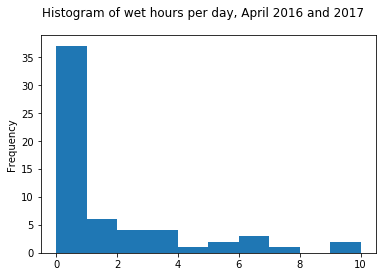

In [239]:
df['Wet_hours']=df['Heavy Rain']+df['Rain']+df['Light Rain']+df['Light Snow']
df.groupby(['date'])['Wet_hours'].sum().plot.hist()
plt.suptitle('Histogram of wet hours per day, April 2016 and 2017')

In [247]:
wet_hours=df.groupby('date')['Wet_hours'].sum()
type(wet_hours)
wet_hours

date
2016-04-01     1
2016-04-02     3
2016-04-03     1
2016-04-04    10
2016-04-05     0
2016-04-06     0
2016-04-07     1
2016-04-08     0
2016-04-09     4
2016-04-10     0
2016-04-11     2
2016-04-12     5
2016-04-13     0
2016-04-14     0
2016-04-15     0
2016-04-16     0
2016-04-17     0
2016-04-18     0
2016-04-19     0
2016-04-20     0
2016-04-21     0
2016-04-22     0
2016-04-23     7
2016-04-24     0
2016-04-25     0
2016-04-26     3
2016-04-27     0
2016-04-28     0
2016-04-29     2
2016-04-30     0
2017-04-01     0
2017-04-02     0
2017-04-03     1
2017-04-04     6
2017-04-05     0
2017-04-06     6
2017-04-07     0
2017-04-08     0
2017-04-09     0
2017-04-10     0
2017-04-11     0
2017-04-12     2
2017-04-13     0
2017-04-14     0
2017-04-15     0
2017-04-16     1
2017-04-17     0
2017-04-18     0
2017-04-19     0
2017-04-20     3
2017-04-21     3
2017-04-22     5
2017-04-23     0
2017-04-24     0
2017-04-25    10
2017-04-26     6
2017-04-27     0
2017-04-28     1
2017-04-2

In [271]:
df_wet=pd.DataFrame({'wet_hours' : df.groupby( [ "date"] )['Wet_hours'].sum()}).reset_index()
df_wet['binary(1+)']=(df_wet.wet_hours > 1).astype(int)
df_wet['binary(2+)']=(df_wet.wet_hours > 2).astype(int)
df_wet['binary(3+)']=(df_wet.wet_hours > 3).astype(int)

# What share of wet days to the cut-offs give us?
one_hour=df_wet['binary(1+)'].sum()
two_hour=df_wet['binary(2+)'].sum()
three_hour=df_wet['binary(3+)'].sum()

print("Percent of days classed as wet: 1 hour: {:.1f},    2_hour: {:.1f},    3_hour {:.1f}".format(one_hour/60*100, two_hour/60*100, three_hour/60*100))

#temp=df.groupby('date')
#temp
#df_daily=pd.DataFrame?
#df_daily.drop_duplicates(subset='date',keep='first',inplace=True)
#df_daily.head(2)

Percent of days classed as wet: 1 hour: 28.3,    2_hour: 21.7,    3_hour 15.0


In [272]:
df_wet

,date,wet_hours,binary(1+),binary(2+),binary(3+)
0,2016-04-01,1,0,0,0
1,2016-04-02,3,1,1,0
2,2016-04-03,1,0,0,0
3,2016-04-04,10,1,1,1
4,2016-04-05,0,0,0,0
5,2016-04-06,0,0,0,0
6,2016-04-07,1,0,0,0
7,2016-04-08,0,0,0,0
8,2016-04-09,4,1,1,1
9,2016-04-10,0,0,0,0


In [273]:
df_wet.shape
df_wet.to_csv('wet_days.csv')